In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genCo import getGenCos, plotResults 
from main import getFutureData
from utilsData import fuelDict, getISO

In [9]:
dfISO, numGenerators, totalCap, __ = getISO()

Total Capacity:  38909.853134000026 Number of Generators:  1100 Total CSO:  31304.248000000032


In [10]:
cap_rate = 1.0
genCos = getGenCos(dfISO, esCharge=1)

{'Landfill Gas': 50.21099999999999, 'Gas': 15024.574, 'Hydro': 3023.4119999999994, 'Oil': 4973.496999999999, 'Refuse/Woods': 734.3950000000001, 'Nuclear': 3333.1130000000003, 'Coal': 438.0, 'Wind': 281.55499999999995, 'Gas-Other': 3.7969999999999997, 'Solar': 1.9660000000000002, 'ES': 22.711000000000006, 'Demand': 3514.0669999999977}
{'Landfill Gas': 88.63034999999999, 'Gas': 17713.101769000004, 'Hydro': 3555.623715, 'Oil': 6477.61851, 'Refuse/Woods': 1069.70509, 'Nuclear': 3606.65085, 'Coal': 559.16035, 'Wind': 898.4563499999998, 'Gas-Other': 9.951, 'Solar': 991.5863500000007, 'ES': 59.27799999999999, 'Demand': 3880.0907999999954}
{'Landfill Gas': 51.025999999999996, 'Gas': 14900.046, 'Hydro': 2856.9010000000003, 'Oil': 4980.543, 'Refuse/Woods': 724.3920000000002, 'Nuclear': 3333.1130000000003, 'Coal': 438.0, 'Wind': 114.59999999999998, 'Gas-Other': 3.452, 'Solar': 269.629, 'ES': 25.300000000000004, 'Demand': 3607.245999999998}
{'Landfill Gas': 88.63034999999999, 'Gas': 17713.10176900

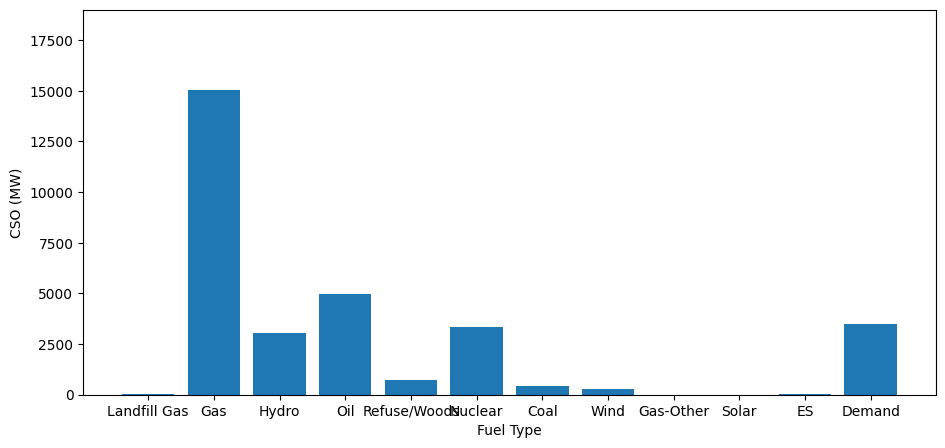

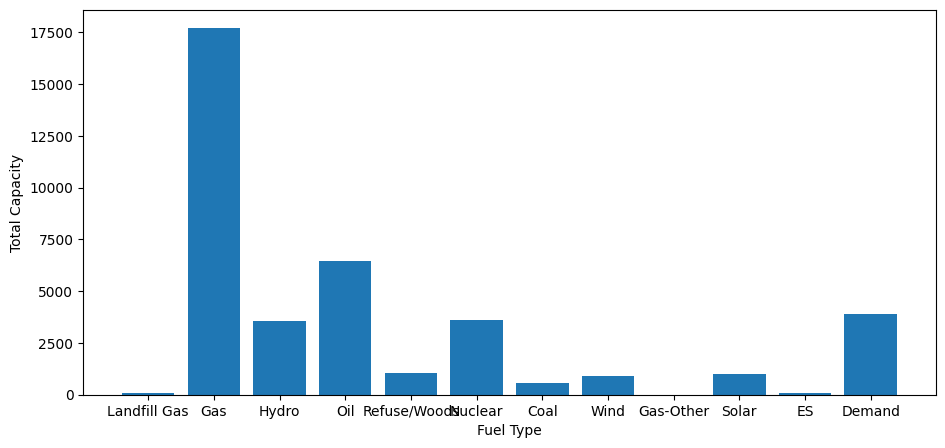

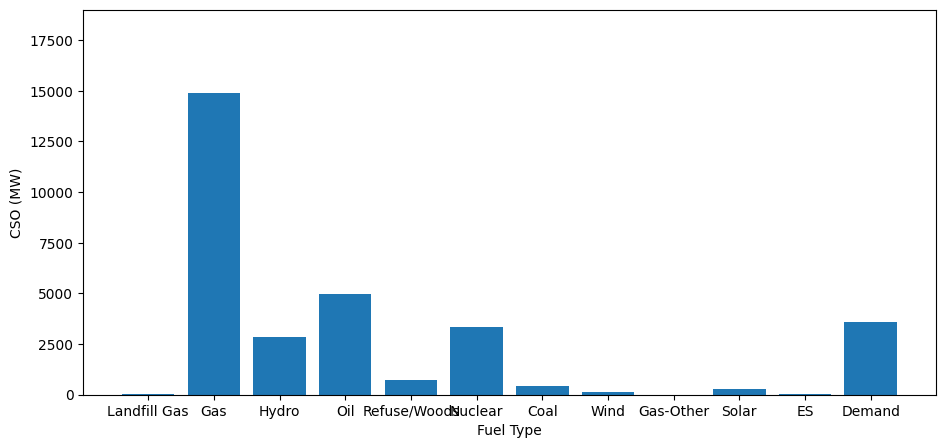

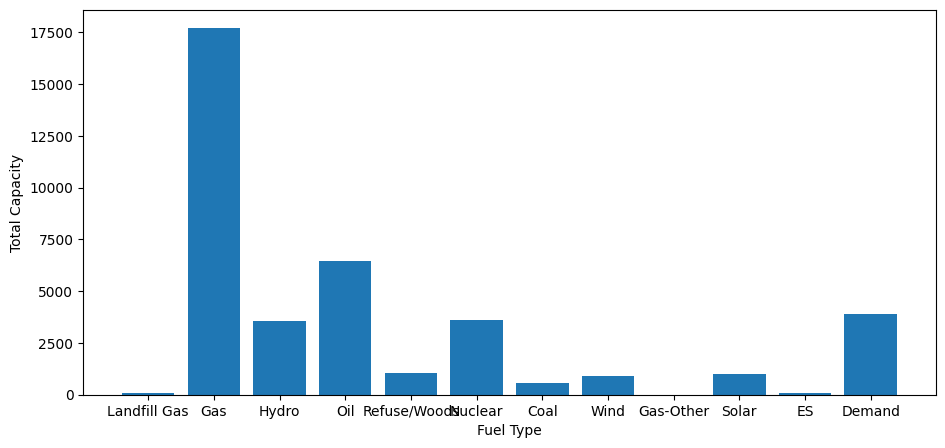

In [12]:
for month in ['January', 'July']:
    for gen in genCos: gen.updateCSO(dfISO, month);
    
    plt.figure(figsize=(11, 5))
    # plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.figure(figsize=(11, 5))

    # plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    # plt.bar(labels2, np.array(weights) / np.array(weights2))
    plt.bar(labels2, np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');

In [10]:
__, __, __, dfISO, info = getFutureData(ISO='ISNE', verbose=False, path='data/forecast/' , 
                                                                        load_rate='high', vre_mix='high')
numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]
genCos = getGenCos(dfISO, esCharge=1)

{'Landfill Gas': 35.642907670508365, 'Gas': 10665.382164679462, 'Hydro': 2146.2069021908965, 'Oil': 3530.4991808677446, 'Refuse/Woods': 521.3194953034792, 'Nuclear': 2366.0520386841754, 'Coal': 310.9197896811986, 'Wind': 5862.668808540959, 'Gas-Other': 2.6953480397705736, 'Solar': 40.93696392389239, 'ES': 766.2539221971053, 'Demand': 2494.5045035745216, 'LD': 400.0}
{'Landfill Gas': 62.91536479765074, 'Gas': 12573.867298217228, 'Hydro': 2524.004058569138, 'Oil': 4598.218686676343, 'Refuse/Woods': 759.3435653052687, 'Nuclear': 2560.2263098984386, 'Coal': 396.9269826942133, 'Wind': 18708.074866298084, 'Gas-Other': 7.063842071044766, 'Solar': 20647.27092440189, 'ES': 2000.0000000000005, 'Demand': 2754.33108557067, 'LD': 500.0}
{'Landfill Gas': 36.22144563532612, 'Gas': 10576.984403105442, 'Hydro': 2028.006981872159, 'Oil': 3535.5008722789175, 'Refuse/Woods': 514.2187403806914, 'Nuclear': 2366.0520386841754, 'Coal': 310.9197896811986, 'Wind': 2386.2543569064437, 'Gas-Other': 2.450445465706

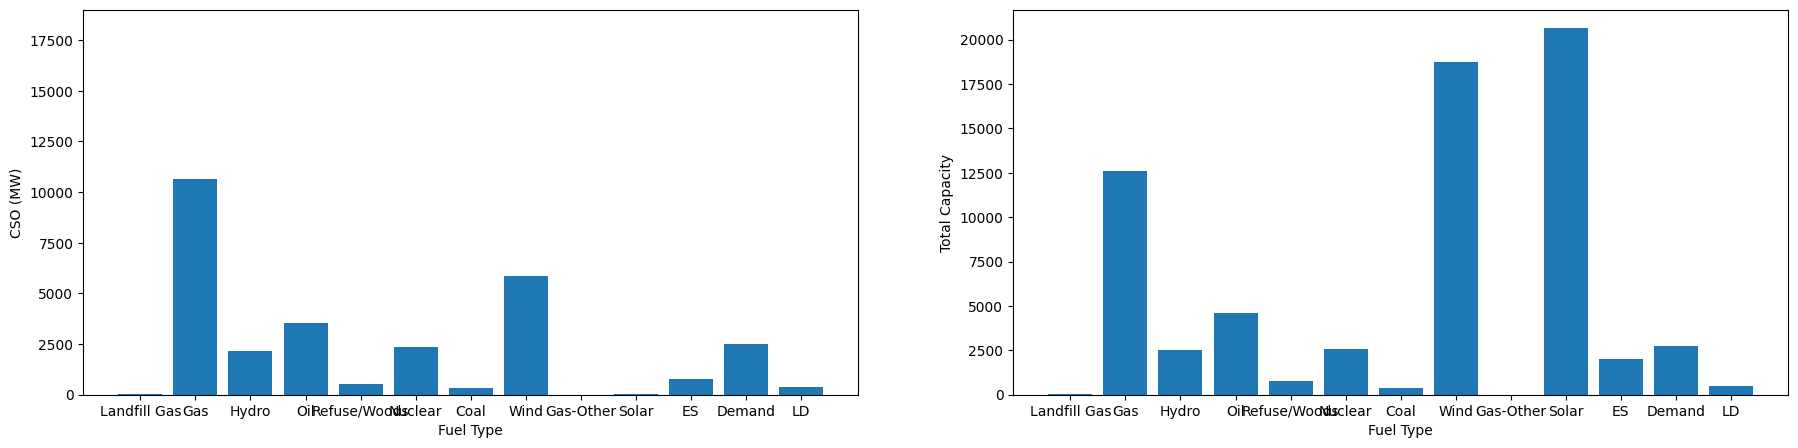

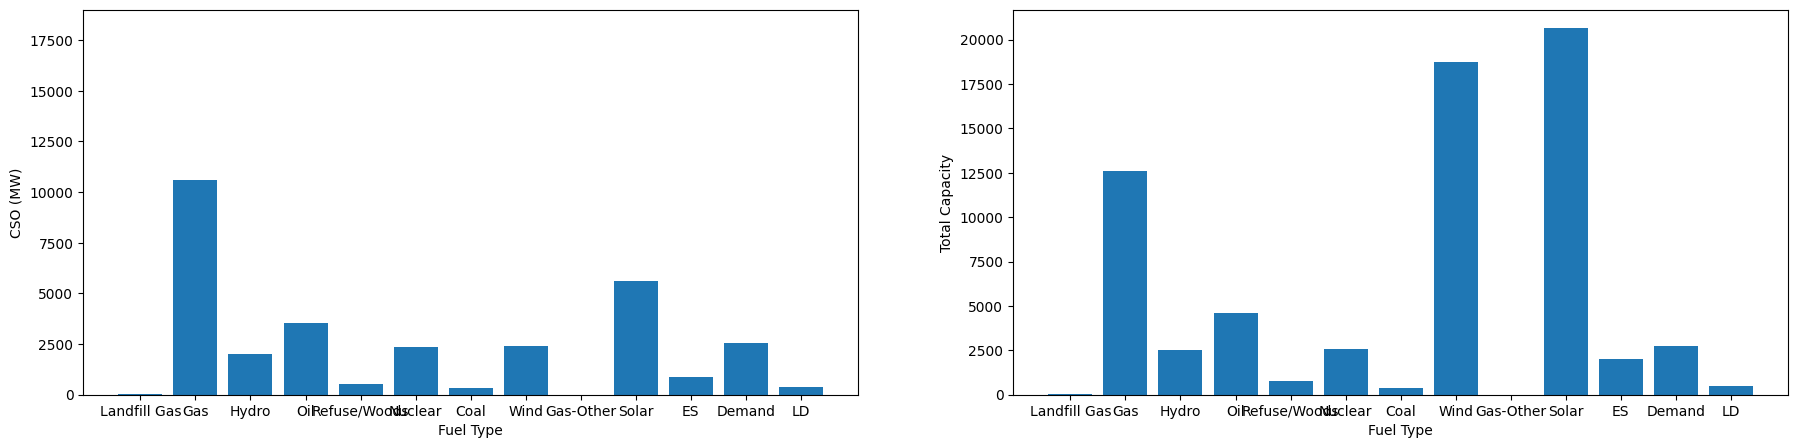

In [11]:
for month in ['January', 'July']:    
    for gen in genCos: gen.updateCSO(dfISO, month);

    plt.figure(figsize=(22, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    # plt.bar(labels2, np.array(weights) / np.array(weights2))
    plt.bar(labels2, np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');

In [5]:
import datetime

def plotData(dfHourlyLoad, dfHourlySolar, dfHourlyWind, totalCap, totalCSO, yearPlot="2023"):
    month, day, year = map(int,dfHourlyLoad.loc[0]['Date'].split('/'))
    start = datetime(year, month, day, int(dfHourlyLoad.loc[0]['Hour Ending']) - 1)
    month, day, year = map(int,dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Date'].split('/'))
    end =  datetime(year, month, day, int(dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Hour Ending']) - 1)

    timeRange = pd.date_range(start, end, periods=len(dfHourlyLoad))


    plt.plot(timeRange, dfHourlyLoad['Total Load'], label='Total Load')
    plt.plot(timeRange, dfHourlySolar['tot_solar_mwh'], label='Solar')
    plt.plot(timeRange, dfHourlyWind['tot_wind_mwh'], label='Wind')
    plt.plot(timeRange, totalCap * np.ones(len(dfHourlyLoad)), 'k--', label='Total Capacity')
    plt.plot(timeRange, totalCSO * np.ones(len(dfHourlyLoad)), 'k--', label='Total CSO')

    plt.xlabel('Date')
    plt.ylabel('Load (MW)')
    plt.title('Hourly Load of ' + yearPlot)
    plt.legend()

In [6]:
dfISO = pd.read_csv('data/CELT2023.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/CELT2023.csv'

In [7]:
for month in ['January']:    
    plt.figure(figsize=(15, 5))
    capHist = {}
    for i in range(len(dfISO)):
        genco = dfISO.iloc[i]
        temp = genco['Nameplate Capacity (MW)']

        fuelType = fuelDict[genco['Primary Fuel Type']]
        # fuelType = genco['Primary Fuel Type']


        if fuelType in capHist:
            capHist[fuelType] += temp
        else:
            capHist[fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())
    print(labels2)
    plt.bar(labels2, np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');

KeyError: 'Primary Fuel Type'

<Figure size 1500x500 with 0 Axes>